# Healthcare for all scenario - 2 candidates

### Objective 

In this notebook I will attempt to predict the target_d donation amount, on the healthcare for all data, using linear regression 

I will prepare 2 candidate models 

## get data

- note the first couple of cells, I am moving around inside my computer to retrieve the data 

In [222]:
!pwd

/Users/siandavies/Documents/GitHub/BCNDATA0122/ClassMaterials/Week2/Day1


In [223]:
!ls

H4A_2candidates.ipynb            data for class
ML thought helper end to end.pdf merged_healthcare.csv
SWOT template.docx


In [224]:
#cd ..

In [225]:
import numpy as np 
import pandas as pd 
import warnings
warnings.simplefilter(action='ignore')

In [226]:
file1=pd.read_csv('data for class/file1.csv')

In [227]:
file2=pd.read_csv('data for class/file2.txt',sep='\t')

In [228]:
file3=pd.read_excel('data for class/file3.xlsx')

In [229]:
file4=pd.read_excel('data for class/file4.xlsx')

## merge data frames 

In [230]:
data=pd.concat([file1,file2,file3,file4],axis=0)

In [231]:
data.head()

,CONTROLN,STATE,GENDER,HV1,IC1,IC4,HVP1,IC5,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,DOMAIN,TARGET_D
0,44060,FL,M,AAA896,392,520.0,7,21975,6,16,430.0,466,28.000000,1,1901,C2,100.0
1,96093,IL,M,537.00,365,473.0,0,19387,1,89,415.0,410,5.666667,0,0,T2,7.0
2,43333,FL,F,725.00,301,436.0,3,18837,11,17,340.0,361,4.111111,0,2501,C2,5.0
3,21885,NC,M,AAA1095,401,413.0,7,14014,1,74,407.0,399,27.277778,0,2208,T2,38.0
4,190108,FL,F,995.00,252,348.0,0,17991,5,6,280.0,316,6.000000,28,0,C2,5.0


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4028 entries, 0 to 1005
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONTROLN  4028 non-null   int64  
 1   STATE     4028 non-null   object 
 2   GENDER    3892 non-null   object 
 3   HV1       4026 non-null   object 
 4   IC1       4028 non-null   int64  
 5   IC4       4027 non-null   float64
 6   HVP1      4028 non-null   int64  
 7   IC5       4028 non-null   object 
 8   POBC1     4028 non-null   int64  
 9   POBC2     4028 non-null   int64  
 10  IC2       4027 non-null   float64
 11  IC3       4028 non-null   int64  
 12  AVGGIFT   4028 non-null   float64
 13  TCODE     4028 non-null   int64  
 14  DOB       4028 non-null   int64  
 15  DOMAIN    4028 non-null   object 
 16  TARGET_D  4028 non-null   float64
dtypes: float64(4), int64(8), object(5)
memory usage: 566.4+ KB


In [233]:
# reset the index because it has been truncated in the concat() 
data.reset_index(drop=True, inplace=True)

## Check the basics with describe, info

In [234]:
data.describe()

,CONTROLN,IC1,IC4,HVP1,POBC1,POBC2,IC2,IC3,AVGGIFT,TCODE,DOB,TARGET_D
count,4028.000000,4028.000000,4027.000000,4028.000000,4028.000000,4028.000000,4027.000000,4028.000000,4028.000000,4028.000000,4028.000000,4028.000000
mean,99028.898709,351.569265,444.664515,15.961519,6.878848,55.476167,400.639930,399.788232,11.771435,76.294439,2708.451092,15.645603
std,58176.975019,168.316241,174.857272,28.841221,9.513976,21.510554,180.377938,164.702061,10.136313,1189.959757,2054.519861,12.672374
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,0.000000,0.000000,1.000000
25%,46162.000000,239.000000,325.000000,0.000000,1.000000,41.000000,284.000000,287.000000,7.181818,0.000000,609.750000,10.000000
50%,101669.000000,318.000000,410.000000,1.000000,4.000000,57.000000,366.000000,365.000000,10.000000,1.000000,2656.500000,13.460000
75%,151683.000000,425.000000,528.000000,14.000000,9.000000,73.000000,477.000000,479.250000,14.388462,2.000000,4401.000000,20.000000
max,191779.000000,1500.000000,1331.000000,99.000000,79.000000,99.000000,1500.000000,1311.000000,450.000000,39002.000000,9310.000000,200.000000


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONTROLN  4028 non-null   int64  
 1   STATE     4028 non-null   object 
 2   GENDER    3892 non-null   object 
 3   HV1       4026 non-null   object 
 4   IC1       4028 non-null   int64  
 5   IC4       4027 non-null   float64
 6   HVP1      4028 non-null   int64  
 7   IC5       4028 non-null   object 
 8   POBC1     4028 non-null   int64  
 9   POBC2     4028 non-null   int64  
 10  IC2       4027 non-null   float64
 11  IC3       4028 non-null   int64  
 12  AVGGIFT   4028 non-null   float64
 13  TCODE     4028 non-null   int64  
 14  DOB       4028 non-null   int64  
 15  DOMAIN    4028 non-null   object 
 16  TARGET_D  4028 non-null   float64
dtypes: float64(4), int64(8), object(5)
memory usage: 535.1+ KB


## Basic Cleaning steps 

### drop or replace nulls 

In [236]:
#most nulls are on gender - lets do a replace 
data['GENDER']= data['GENDER'].fillna("Unknown")

In [237]:
#only a small number of remaining nulls - lets drop 
data=data.dropna()

In [238]:
data.reset_index(drop=True, inplace=True)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CONTROLN  4024 non-null   int64  
 1   STATE     4024 non-null   object 
 2   GENDER    4024 non-null   object 
 3   HV1       4024 non-null   object 
 4   IC1       4024 non-null   int64  
 5   IC4       4024 non-null   float64
 6   HVP1      4024 non-null   int64  
 7   IC5       4024 non-null   object 
 8   POBC1     4024 non-null   int64  
 9   POBC2     4024 non-null   int64  
 10  IC2       4024 non-null   float64
 11  IC3       4024 non-null   int64  
 12  AVGGIFT   4024 non-null   float64
 13  TCODE     4024 non-null   int64  
 14  DOB       4024 non-null   int64  
 15  DOMAIN    4024 non-null   object 
 16  TARGET_D  4024 non-null   float64
dtypes: float64(4), int64(8), object(5)
memory usage: 534.6+ KB


## More advanced cleaning steps 

### managing columns 

In [240]:
data.columns

Index(['CONTROLN', 'STATE', 'GENDER', 'HV1', 'IC1', 'IC4', 'HVP1', 'IC5',
       'POBC1', 'POBC2', 'IC2', 'IC3', 'AVGGIFT', 'TCODE', 'DOB', 'DOMAIN',
       'TARGET_D'],
      dtype='object')

In [241]:
#standardise columns - set up list to collect lower case column names and iterate 
cols=[]
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())

In [242]:
#replace the columns by position 
data.columns=cols

In [243]:
#new columns 
data.columns

Index(['controln', 'state', 'gender', 'hv1', 'ic1', 'ic4', 'hvp1', 'ic5',
       'pobc1', 'pobc2', 'ic2', 'ic3', 'avggift', 'tcode', 'dob', 'domain',
       'target_d'],
      dtype='object')

In [244]:
# column rename 
new_names={'hv1':'medianhv','ic5':'percapita'}

In [245]:
data.rename(columns=new_names,inplace=True)

In [246]:
# IF you needed to - drop a couple of columns using drop()
data=data.drop(['controln','pobc2'],axis=1)

In [247]:
data.head()

,state,gender,medianhv,ic1,ic4,hvp1,percapita,pobc1,ic2,ic3,avggift,tcode,dob,domain,target_d
0,FL,M,AAA896,392,520.0,7,21975,6,430.0,466,28.000000,1,1901,C2,100.0
1,IL,M,537.00,365,473.0,0,19387,1,415.0,410,5.666667,0,0,T2,7.0
2,FL,F,725.00,301,436.0,3,18837,11,340.0,361,4.111111,0,2501,C2,5.0
3,NC,M,AAA1095,401,413.0,7,14014,1,407.0,399,27.277778,0,2208,T2,38.0
4,FL,F,995.00,252,348.0,0,17991,5,280.0,316,6.000000,28,0,C2,5.0


### Data types

In [248]:
data.dtypes

state         object
gender        object
medianhv      object
ic1            int64
ic4          float64
hvp1           int64
percapita     object
pobc1          int64
ic2          float64
ic3            int64
avggift      float64
tcode          int64
dob            int64
domain        object
target_d     float64
dtype: object

In [249]:
data['medianhv']=pd.to_numeric(data['medianhv'],errors='coerce')

In [250]:
data.info()
# note we now have some nulls in the medianhv , following our change 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      4024 non-null   object 
 1   gender     4024 non-null   object 
 2   medianhv   4017 non-null   float64
 3   ic1        4024 non-null   int64  
 4   ic4        4024 non-null   float64
 5   hvp1       4024 non-null   int64  
 6   percapita  4024 non-null   object 
 7   pobc1      4024 non-null   int64  
 8   ic2        4024 non-null   float64
 9   ic3        4024 non-null   int64  
 10  avggift    4024 non-null   float64
 11  tcode      4024 non-null   int64  
 12  dob        4024 non-null   int64  
 13  domain     4024 non-null   object 
 14  target_d   4024 non-null   float64
dtypes: float64(5), int64(6), object(4)
memory usage: 471.7+ KB


In [251]:
# change per capital income field (ic5) to float 
data['percapita']=pd.to_numeric(data['percapita'],errors='coerce')

In [252]:
data.info()
# note we now have some nulls in the per capita income , following our change 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      4024 non-null   object 
 1   gender     4024 non-null   object 
 2   medianhv   4017 non-null   float64
 3   ic1        4024 non-null   int64  
 4   ic4        4024 non-null   float64
 5   hvp1       4024 non-null   int64  
 6   percapita  4018 non-null   float64
 7   pobc1      4024 non-null   int64  
 8   ic2        4024 non-null   float64
 9   ic3        4024 non-null   int64  
 10  avggift    4024 non-null   float64
 11  tcode      4024 non-null   int64  
 12  dob        4024 non-null   int64  
 13  domain     4024 non-null   object 
 14  target_d   4024 non-null   float64
dtypes: float64(6), int64(6), object(3)
memory usage: 471.7+ KB


In [253]:
# we need to drop nulls again - or we could fill those missing values with the median 
# med_hv1=data['medianhv'].median()
# data['medianhv']=data['medianhv'].fillna(med_hv1)
data=data.dropna()

In [254]:
data.reset_index(drop=True, inplace=True)

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      4011 non-null   object 
 1   gender     4011 non-null   object 
 2   medianhv   4011 non-null   float64
 3   ic1        4011 non-null   int64  
 4   ic4        4011 non-null   float64
 5   hvp1       4011 non-null   int64  
 6   percapita  4011 non-null   float64
 7   pobc1      4011 non-null   int64  
 8   ic2        4011 non-null   float64
 9   ic3        4011 non-null   int64  
 10  avggift    4011 non-null   float64
 11  tcode      4011 non-null   int64  
 12  dob        4011 non-null   int64  
 13  domain     4011 non-null   object 
 14  target_d   4011 non-null   float64
dtypes: float64(6), int64(6), object(3)
memory usage: 470.2+ KB


### duplicates 

In [256]:
# search for and eliminate duplicates 
data_dedupe=data.drop_duplicates()

In [257]:
data_dedupe.shape

(3984, 15)

In [258]:
#looks ok - replace 
data=data.drop_duplicates()

In [259]:
data.reset_index(drop=True, inplace=True)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      3984 non-null   object 
 1   gender     3984 non-null   object 
 2   medianhv   3984 non-null   float64
 3   ic1        3984 non-null   int64  
 4   ic4        3984 non-null   float64
 5   hvp1       3984 non-null   int64  
 6   percapita  3984 non-null   float64
 7   pobc1      3984 non-null   int64  
 8   ic2        3984 non-null   float64
 9   ic3        3984 non-null   int64  
 10  avggift    3984 non-null   float64
 11  tcode      3984 non-null   int64  
 12  dob        3984 non-null   int64  
 13  domain     3984 non-null   object 
 14  target_d   3984 non-null   float64
dtypes: float64(6), int64(6), object(3)
memory usage: 467.0+ KB


## cleaning the values in some categorical columns 

In [261]:
data['gender'].unique()

array(['M', 'F', 'female', 'Male', 'Unknown', 'U', 'J', 'male', 'Female',
       'feamale', 'A'], dtype=object)

In [262]:
data['gender']=data['gender'].str.title()

In [263]:
def clean_gender(x):
    if x in['M','Male']:
        return 'Male'
    if x in['F','Female','Feamale']:
        return 'Female'
    else:
        return 'Unknown'

In [264]:
data['gender']=list(map(clean_gender,data['gender']))

In [265]:
data['gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [266]:
data['state'].unique()

array(['IL', 'FL', 'NC', 'TX', 'NV', 'CA', 'Cali', 'AP', 'MI', 'OK', 'AR',
       'IN', 'MT', 'WI', 'MO', 'HI', 'UT', 'GA', 'WA', 'ID', 'CT', 'AL',
       'ND', 'SC', 'IA', 'CO', 'LA', 'OR', 'SD', 'TN', 'NM', 'AZ', 'MN',
       'KY', 'NJ', 'NE', 'KS', 'California', 'MS', 'NY', 'Arizona', 'WY',
       'Tennessee', 'MD', 'AK', 'VA', 'AE', 'AA', 'PA', 'VT', 'WV', 'GU'],
      dtype=object)

In [267]:
def clean_state(x): 
    if x in ['Cali','CA', 'California']:
        return 'CA'
    elif x == 'Arizona':
        return 'AZ'
    elif x == 'Tennessee':
        return 'TN'
    else:
        return x 

In [268]:
data['state']=list(map(clean_state,data['state']))

In [269]:
data['state'].unique()

array(['IL', 'FL', 'NC', 'TX', 'NV', 'CA', 'AP', 'MI', 'OK', 'AR', 'IN',
       'MT', 'WI', 'MO', 'HI', 'UT', 'GA', 'WA', 'ID', 'CT', 'AL', 'ND',
       'SC', 'IA', 'CO', 'LA', 'OR', 'SD', 'TN', 'NM', 'AZ', 'MN', 'KY',
       'NJ', 'NE', 'KS', 'MS', 'NY', 'WY', 'MD', 'AK', 'VA', 'AE', 'AA',
       'PA', 'VT', 'WV', 'GU'], dtype=object)

In [270]:
data.head()

,state,gender,medianhv,ic1,ic4,hvp1,percapita,pobc1,ic2,ic3,avggift,tcode,dob,domain,target_d
0,IL,Male,537.0,365,473.0,0,19387.0,1,415.0,410,5.666667,0,0,T2,7.0
1,FL,Female,725.0,301,436.0,3,18837.0,11,340.0,361,4.111111,0,2501,C2,5.0
2,FL,Female,995.0,252,348.0,0,17991.0,5,280.0,316,6.000000,28,0,C2,5.0
3,IL,Male,764.0,457,501.0,1,16022.0,2,477.0,480,25.571429,1,6104,S2,30.0
4,NC,Female,775.0,318,419.0,5,13491.0,0,364.0,380,4.625000,0,4407,R2,12.0


## Some EDA, plotting + maybe a clean outliers step

In [271]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline  

In [272]:
data.describe()

,medianhv,ic1,ic4,hvp1,percapita,pobc1,ic2,ic3,avggift,tcode,dob,target_d
count,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000
mean,1158.437751,351.710592,444.800954,15.959086,16454.678464,6.847641,400.847390,399.919679,11.778064,77.044428,2705.797691,15.639681
std,1034.652748,168.622518,175.150692,28.854663,9459.531394,9.473651,180.698192,164.968663,10.176000,1196.487430,2054.993650,12.640243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,0.000000,0.000000,1.000000
25%,548.000000,239.000000,325.000000,0.000000,11136.000000,1.000000,284.000000,286.750000,7.181818,0.000000,607.750000,10.000000
50%,801.000000,318.000000,410.000000,1.000000,14358.000000,4.000000,366.000000,365.000000,10.000000,1.000000,2701.000000,14.000000
75%,1351.500000,425.000000,528.000000,14.000000,18777.750000,9.000000,478.000000,480.000000,14.428571,2.000000,4401.000000,20.000000
max,5982.000000,1500.000000,1331.000000,99.000000,174523.000000,79.000000,1500.000000,1311.000000,450.000000,39002.000000,9310.000000,200.000000


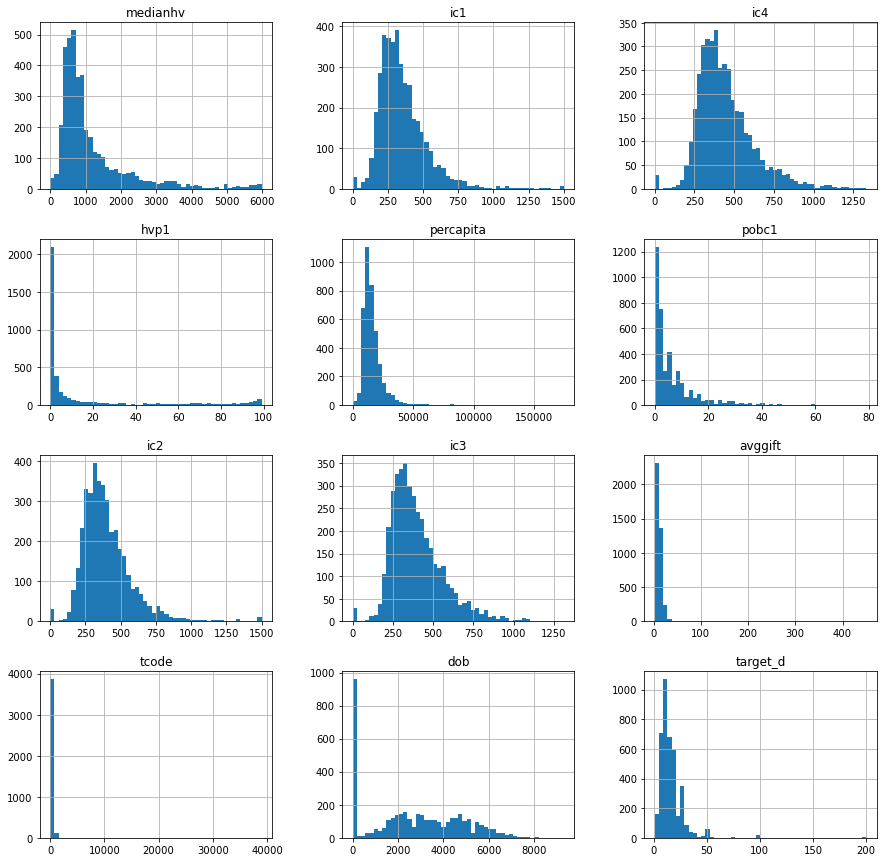

In [273]:
# visualise the numerical columns 
data.hist(figsize=(15,15), bins=50, layout=(4,3));

In [274]:
 # optionally - sns.pairplot(data); # but this takes a few minutes!

#### would we eliminate any columns now ?

In [275]:
#choosing to eliminate columns based on this 
data=data.drop(['tcode'],axis=1)

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      3984 non-null   object 
 1   gender     3984 non-null   object 
 2   medianhv   3984 non-null   float64
 3   ic1        3984 non-null   int64  
 4   ic4        3984 non-null   float64
 5   hvp1       3984 non-null   int64  
 6   percapita  3984 non-null   float64
 7   pobc1      3984 non-null   int64  
 8   ic2        3984 non-null   float64
 9   ic3        3984 non-null   int64  
 10  avggift    3984 non-null   float64
 11  dob        3984 non-null   int64  
 12  domain     3984 non-null   object 
 13  target_d   3984 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 435.9+ KB


#### Looking at specific columns 

<AxesSubplot:>

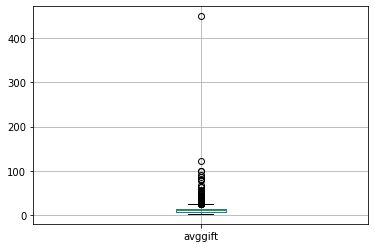

In [277]:
data[['avggift']].boxplot()

<AxesSubplot:>

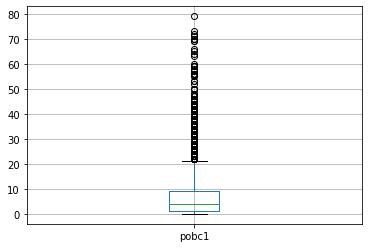

In [278]:
data[['pobc1']].boxplot()

<AxesSubplot:>

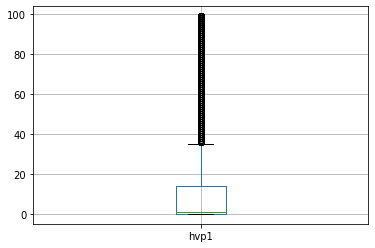

In [279]:
data[['hvp1']].boxplot()

<AxesSubplot:>

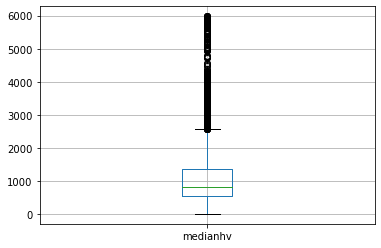

In [280]:
data[['medianhv']].boxplot()

<AxesSubplot:>

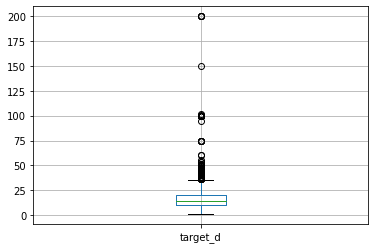

In [281]:
data[['target_d']].boxplot()

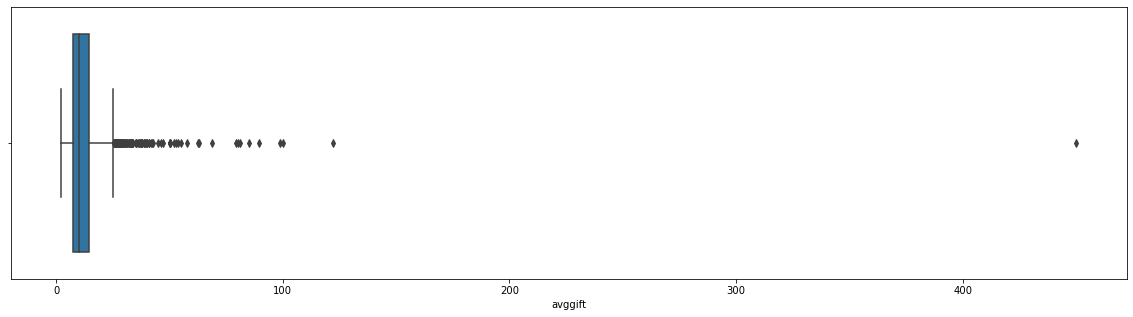

In [282]:
plt.figure(figsize=(20,5))
ax=sns.boxplot(x=data['avggift'])

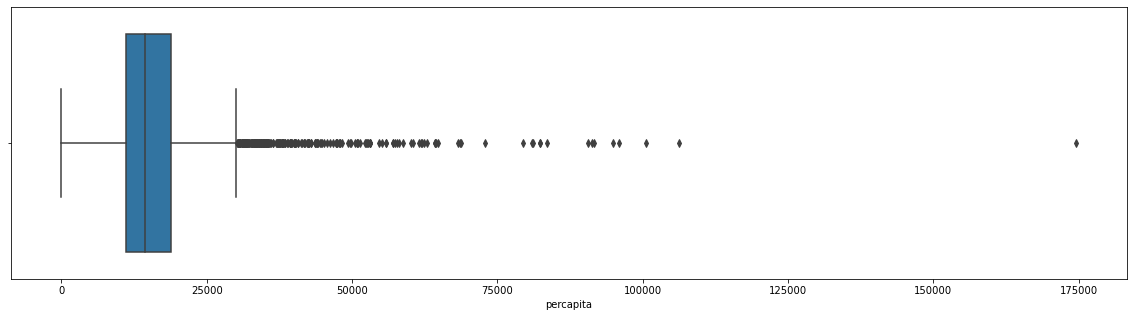

In [283]:
plt.figure(figsize=(20,5))
ax=sns.boxplot(x=data['percapita'])

<AxesSubplot:xlabel='avggift', ylabel='gender'>

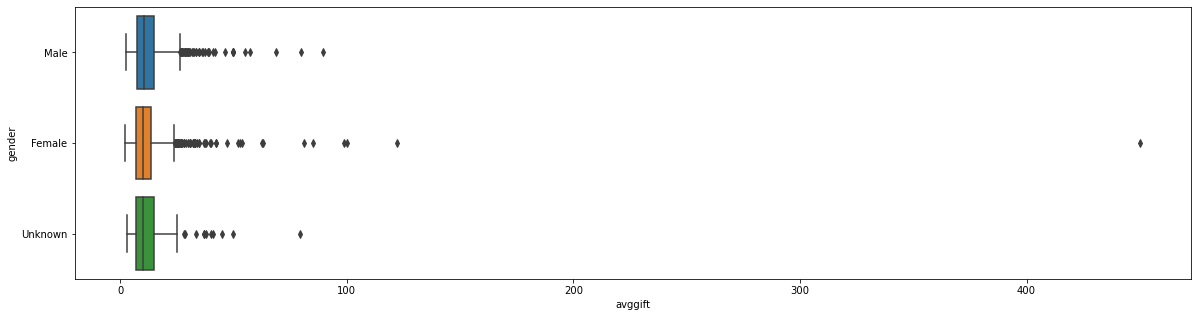

In [284]:
plt.figure(figsize=(20,5))
sns.boxplot(x='avggift',y='gender',data=data)

<AxesSubplot:>

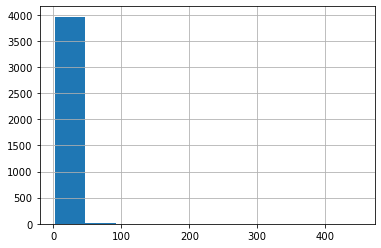

In [285]:
data['avggift'].hist()

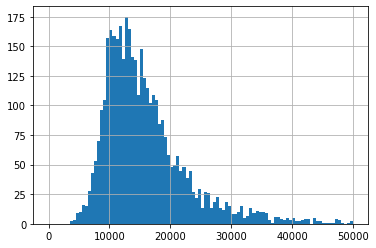

In [286]:
data['percapita'].hist(range=(1,50000),bins=100);

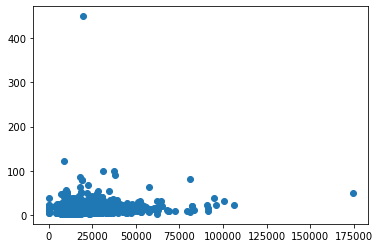

In [287]:
plt.scatter(x='percapita',y='avggift', data=data)

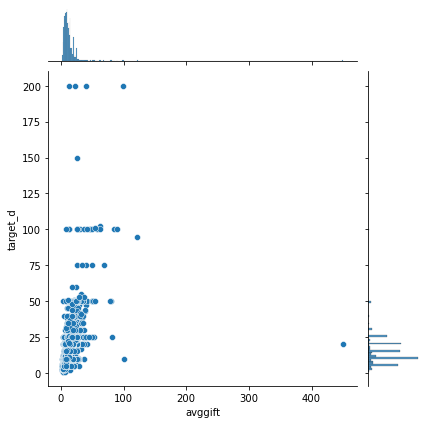

In [288]:
sns.jointplot(data=data, y='target_d',x='avggift');

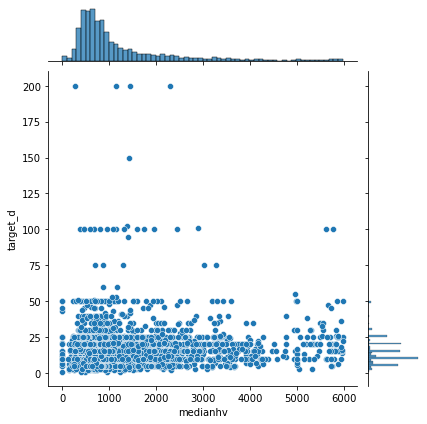

In [289]:
sns.jointplot(data=data, y='target_d',x='medianhv');

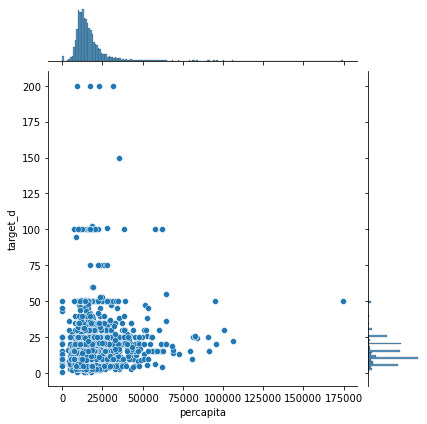

In [290]:
sns.jointplot(data=data, y='target_d',x='percapita');

<AxesSubplot:xlabel='ic2', ylabel='medianhv'>

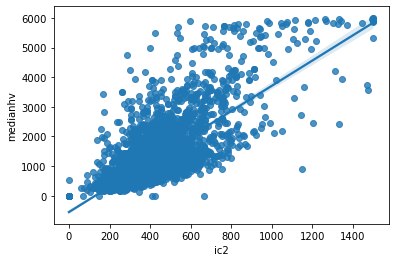

In [291]:
sns.regplot(data=data, x='ic2', y='medianhv')

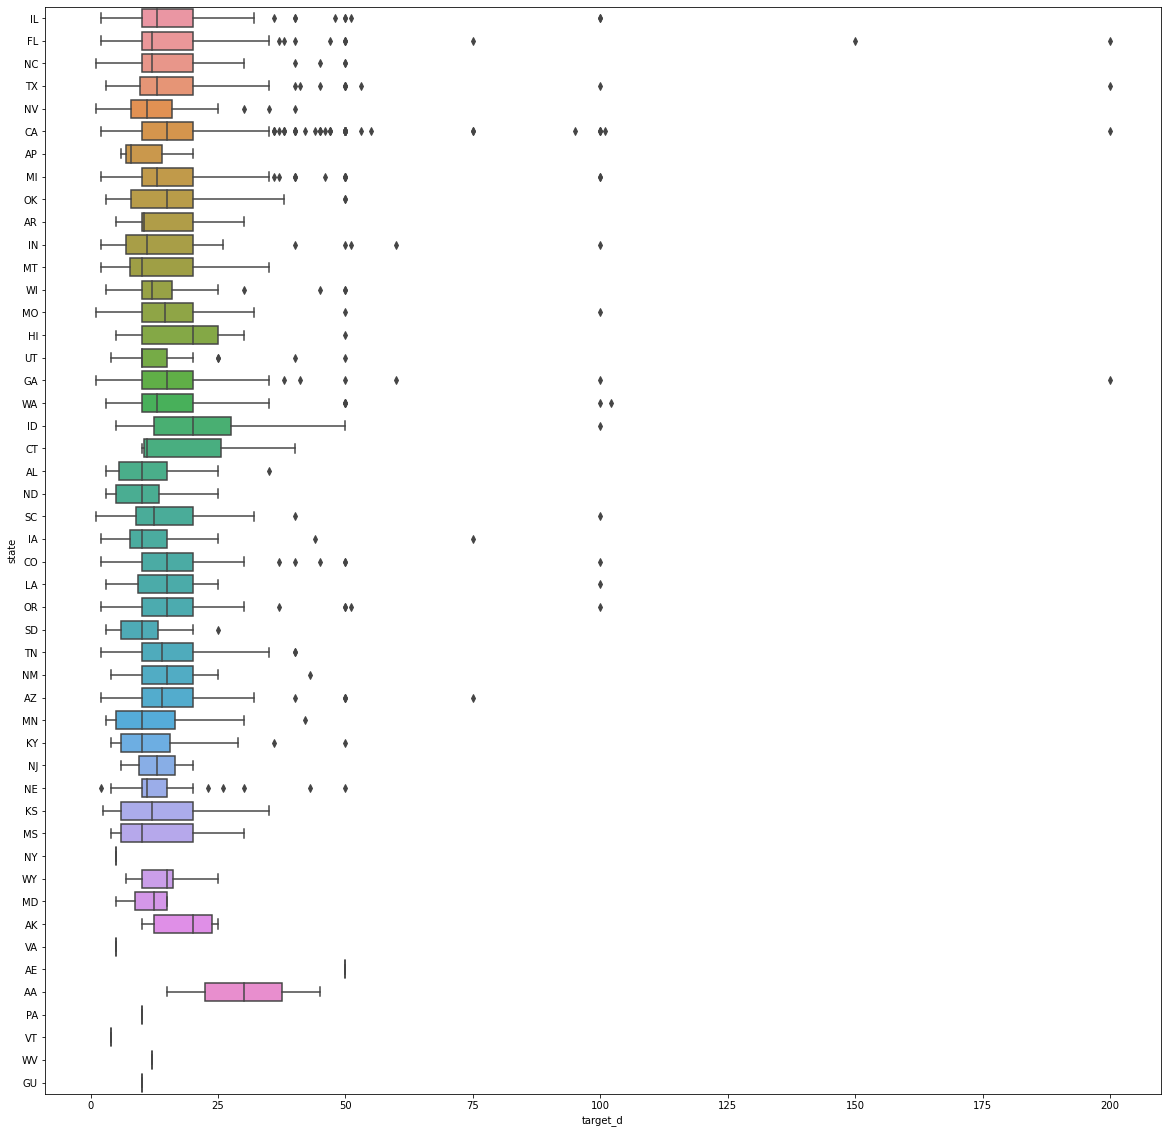

In [292]:
plt.figure(figsize=(20,20))
sns.boxplot(x='target_d',y='state',data=data);

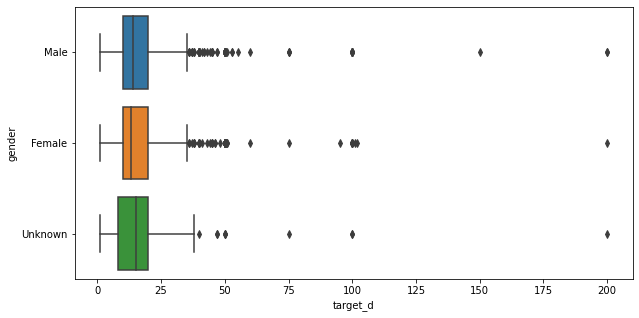

In [293]:
plt.figure(figsize=(10,5))
sns.boxplot(x='target_d',y='gender',data=data);

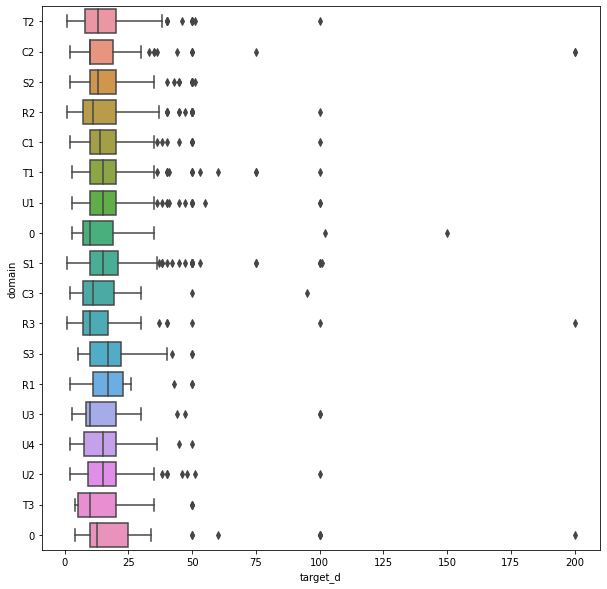

In [294]:
plt.figure(figsize=(10,10))
sns.boxplot(x='target_d',y='domain',data=data);

#### outlier detection and removal on selected columns 

get the upper and lower limits

 + this is based on 1st and 3rd quartiles (25th and 75th percentiles)
+ with an addition of 1.5 x IQR 

- i will do this on per one field only 

<AxesSubplot:>

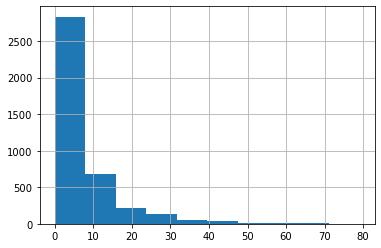

In [295]:
data['pobc1'].hist()

In [296]:
iqr=np.percentile(data['pobc1'],75)-np.percentile(data['pobc1'],25)

In [297]:
upper_limit= np.percentile(data['pobc1'],75)+ 1.5*iqr

In [298]:
upper_limit

21.0

In [299]:
lower_limit= np.percentile(data['pobc1'],25)- 1.5*iqr

In [300]:
lower_limit

-11.0

##### drop data outside of these limits 

In [301]:
## if youre making a DROP change - ensure you call the whole data set 

data=data[(data['pobc1']>lower_limit)&(data['pobc1']<=upper_limit)]

In [302]:
data.reset_index(drop=True, inplace=True)

In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      3696 non-null   object 
 1   gender     3696 non-null   object 
 2   medianhv   3696 non-null   float64
 3   ic1        3696 non-null   int64  
 4   ic4        3696 non-null   float64
 5   hvp1       3696 non-null   int64  
 6   percapita  3696 non-null   float64
 7   pobc1      3696 non-null   int64  
 8   ic2        3696 non-null   float64
 9   ic3        3696 non-null   int64  
 10  avggift    3696 non-null   float64
 11  dob        3696 non-null   int64  
 12  domain     3696 non-null   object 
 13  target_d   3696 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 404.4+ KB


#### check the distribution shape again 

<AxesSubplot:>

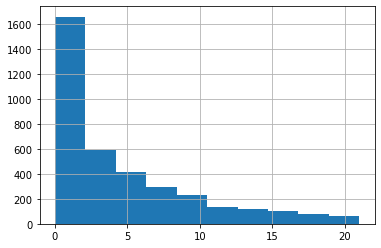

In [304]:
data['pobc1'].hist()

<AxesSubplot:>

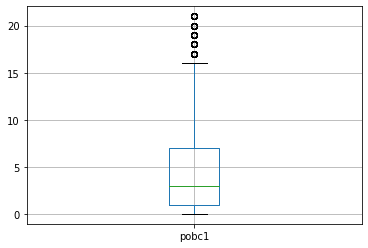

In [305]:
data[['pobc1']].boxplot()

In [306]:
data.info()
# note we lost full rows when we dropped outliers 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      3696 non-null   object 
 1   gender     3696 non-null   object 
 2   medianhv   3696 non-null   float64
 3   ic1        3696 non-null   int64  
 4   ic4        3696 non-null   float64
 5   hvp1       3696 non-null   int64  
 6   percapita  3696 non-null   float64
 7   pobc1      3696 non-null   int64  
 8   ic2        3696 non-null   float64
 9   ic3        3696 non-null   int64  
 10  avggift    3696 non-null   float64
 11  dob        3696 non-null   int64  
 12  domain     3696 non-null   object 
 13  target_d   3696 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 404.4+ KB


### Correlation matrix - and multicollinearity check 

In [307]:
corre_matrix=data.corr() # will only work for numerical fields 

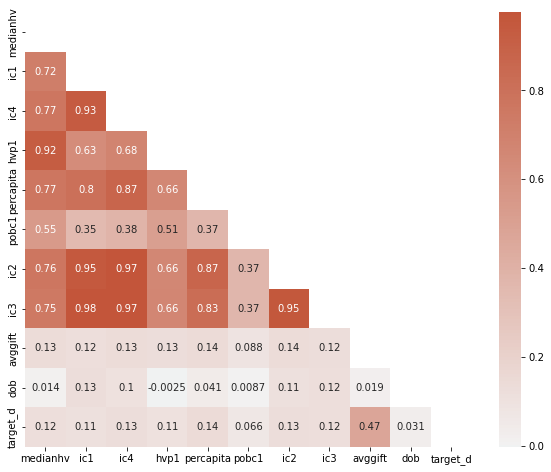

In [308]:
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(corre_matrix, mask=mask, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True);

In [309]:
# do we drop any highly correlated columns now or columns we wont use? 
data=data.drop(['ic2','ic3','ic4','dob','pobc1'],axis=1)

## lets prepare to do some modeling now 

### identify AND isolate target var

In [310]:
y = data['target_d']

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      3696 non-null   object 
 1   gender     3696 non-null   object 
 2   medianhv   3696 non-null   float64
 3   ic1        3696 non-null   int64  
 4   hvp1       3696 non-null   int64  
 5   percapita  3696 non-null   float64
 6   avggift    3696 non-null   float64
 7   domain     3696 non-null   object 
 8   target_d   3696 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 260.0+ KB


## pre processing 

- we need to split data into num and cat for pre processing 

In [312]:
X=data.drop(['target_d'], axis = 1) 

In [313]:
X.head(1)

,state,gender,medianhv,ic1,hvp1,percapita,avggift,domain
0,IL,Male,537.0,365,0,19387.0,5.666667,T2


In [314]:
data_num=X.select_dtypes(include=np.number)

In [315]:
data_num

,medianhv,ic1,hvp1,percapita,avggift
0,537.0,365,0,19387.0,5.666667
1,725.0,301,3,18837.0,4.111111
2,995.0,252,0,17991.0,6.000000
3,764.0,457,1,16022.0,25.571429
4,775.0,318,5,13491.0,4.625000
...,...,...,...,...,...
3691,726.0,485,0,17020.0,17.225806
3692,675.0,163,1,7083.0,7.562500
3693,632.0,279,2,12653.0,8.533333
3694,595.0,252,0,11132.0,14.692308


In [316]:
data_cat=X.select_dtypes(include=object)

In [317]:
data_cat

,state,gender,domain
0,IL,Male,T2
1,FL,Female,C2
2,FL,Female,C2
3,IL,Male,S2
4,NC,Female,R2
...,...,...,...
3691,MI,Male,T1
3692,CA,Male,C3
3693,MI,Female,0
3694,FL,Male,T2


### options - scale numeric variables, encode categoricals

#### First, scaling numericals 

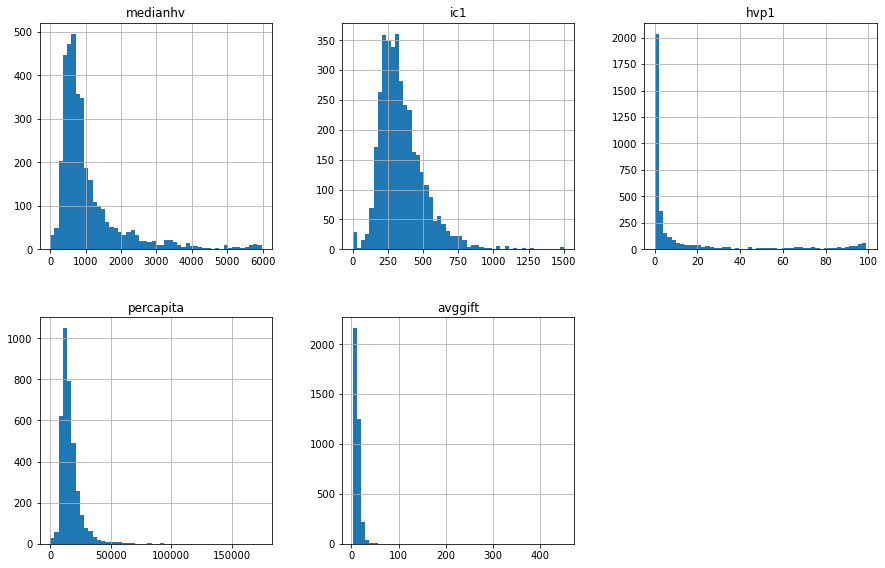

In [318]:
data_num.hist(figsize=(15,15), bins=50, layout=(3,3));

In [319]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_num)
StandardScaler()
scaled=scaler.transform(data_num)

In [320]:
scaleddf=pd.DataFrame(scaled, columns=data_num.columns)
scaleddf

,medianhv,ic1,hvp1,percapita,avggift
0,-0.565375,0.091385,-0.514711,0.329516,-0.597134
1,-0.371568,-0.296474,-0.403172,0.269453,-0.751712
2,-0.093228,-0.593429,-0.514711,0.177067,-0.564010
3,-0.331364,0.648932,-0.477531,-0.037956,1.380834
4,-0.320024,-0.193449,-0.328813,-0.314352,-0.700646
...,...,...,...,...,...
3691,-0.370538,0.818620,-0.514711,0.071029,0.551517
3692,-0.423113,-1.132795,-0.477531,-1.014132,-0.408742
3693,-0.467441,-0.429801,-0.440352,-0.405865,-0.312268
3694,-0.505584,-0.593429,-0.514711,-0.571965,0.299759


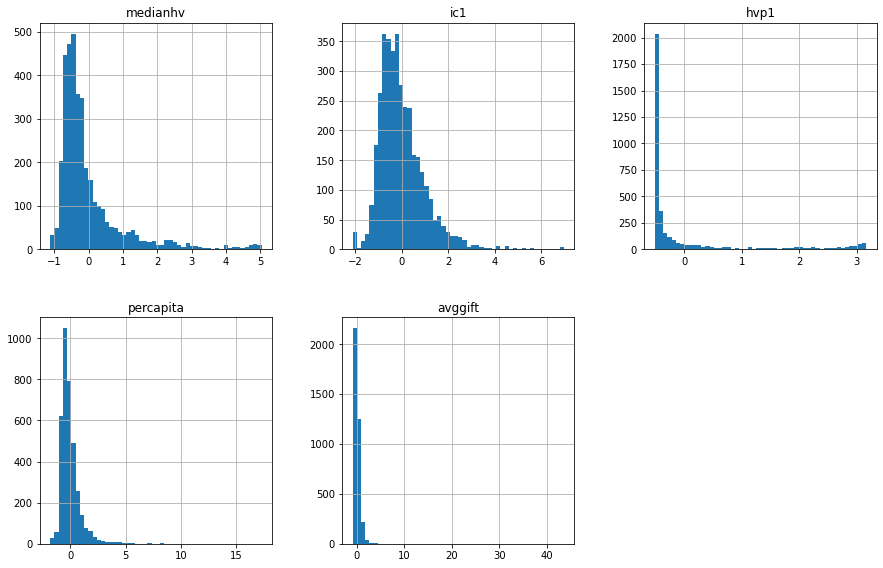

In [321]:
# replot after scaling 
scaleddf.hist(figsize=(15,15), bins=50, layout=(3,3));

In [322]:
from sklearn.preprocessing import MinMaxScaler
scaleddf['avggift']=MinMaxScaler().fit_transform(scaleddf['avggift'].values.reshape(-1, 1))

<AxesSubplot:>

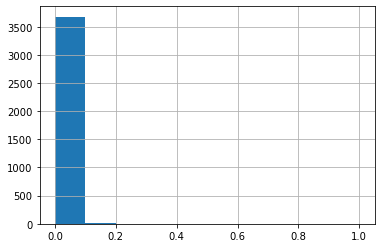

In [323]:
scaleddf['avggift'].hist()

#### Next, encode the categories

In [324]:
X_dummies=pd.get_dummies(data_cat, drop_first=True)

In [325]:
X_dummies.shape

(3696, 66)

In [326]:
X_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   state_AE        3696 non-null   uint8
 1   state_AK        3696 non-null   uint8
 2   state_AL        3696 non-null   uint8
 3   state_AP        3696 non-null   uint8
 4   state_AR        3696 non-null   uint8
 5   state_AZ        3696 non-null   uint8
 6   state_CA        3696 non-null   uint8
 7   state_CO        3696 non-null   uint8
 8   state_CT        3696 non-null   uint8
 9   state_FL        3696 non-null   uint8
 10  state_GA        3696 non-null   uint8
 11  state_GU        3696 non-null   uint8
 12  state_HI        3696 non-null   uint8
 13  state_IA        3696 non-null   uint8
 14  state_ID        3696 non-null   uint8
 15  state_IL        3696 non-null   uint8
 16  state_IN        3696 non-null   uint8
 17  state_KS        3696 non-null   uint8
 18  state_KY        3696 non-nul

## Join the data frames back together 

In [327]:
X_full=pd.concat([X_dummies,scaleddf],axis=1)
X_full.head()

,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,state_CA,state_CO,state_CT,state_FL,...,domain_T3,domain_U1,domain_U2,domain_U3,domain_U4,medianhv,ic1,hvp1,percapita,avggift
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.565375,0.091385,-0.514711,0.329516,0.007607
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,-0.371568,-0.296474,-0.403172,0.269453,0.004132
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,-0.093228,-0.593429,-0.514711,0.177067,0.008351
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.331364,0.648932,-0.477531,-0.037956,0.052063
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.320024,-0.193449,-0.328813,-0.314352,0.005280


# import  and apply model 

## train test split 

In [328]:
X_full.shape

(3696, 71)

In [329]:
y.shape

(3696,)

In [330]:
# train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_full,y, test_size=0.4, random_state=40)


In [331]:
X_train.shape

(2217, 71)

In [332]:
y_train.shape

(2217,)

In [333]:
X_test.shape

(1479, 71)

In [334]:
y_test.shape

(1479,)

## model

In [335]:
# get the model and the metrics 
from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [336]:
# candidate 1 model 

lm=linear_model.LinearRegression()

In [337]:
#set up model and train it 
model=lm.fit(X_train,y_train)
#get the predictions on X test 
predictions=lm.predict(X_test)

In [338]:
predictions

array([25.99685591, 24.23574711, 11.61573851, ..., 15.6785587 ,
       11.66491202,  5.84162595])

In [339]:
#evaluate how good our predictions are 
r2_score(y_test,predictions)
# this is how much of the variation the model explains

-1.8859684792442361e+22

In [340]:
mean_squared_error(y_test,predictions)
#this is how accurate we can be in monetary terms 

3.543411082256214e+24

In [341]:
mean_absolute_error(y_test,predictions)

95462344377.80502

## summarise what we have for this candidate

+ I am able to predict accurately the donation amount +/- 62$